In [2]:
import os
import json
import numpy as np

import bids
from bids import BIDSLayout
#from bids.analysis import auto_model
#from bids.analysis import Analysis

In [3]:
project_dir = os.path.join('/bgfs/bchandrasekaran/krs228/data/', 'FLT/')
bidsroot = os.path.join(project_dir,'data_bids')
deriv_dir = os.path.join(project_dir, 'derivatives')

In [4]:
bidsroot

'/bgfs/bchandrasekaran/krs228/data/FLT/data_bids'

In [5]:
nilearn_dir = os.path.join(deriv_dir, 'nilearn')
if not os.path.exists(nilearn_dir):
        os.makedirs(nilearn_dir)

In [6]:
task_list = ['tonecat']

### import data with `pybids` and test out capabilities

based on: https://github.com/bids-standard/pybids/blob/master/examples/pybids_tutorial.ipynb

In [7]:
layout = BIDSLayout(bidsroot)

In [8]:
all_files = layout.get()

In [9]:
layout.get(return_type='filename', suffix='bold', task='tonecat',extension='nii.gz')


['/bgfs/bchandrasekaran/krs228/data/FLT/data_bids/sub-FLT01/func/sub-FLT01_task-tonecat_run-02_bold.nii.gz',
 '/bgfs/bchandrasekaran/krs228/data/FLT/data_bids/sub-FLT01/func/sub-FLT01_task-tonecat_run-03_bold.nii.gz',
 '/bgfs/bchandrasekaran/krs228/data/FLT/data_bids/sub-FLT01/func/sub-FLT01_task-tonecat_run-04_bold.nii.gz',
 '/bgfs/bchandrasekaran/krs228/data/FLT/data_bids/sub-FLT01/func/sub-FLT01_task-tonecat_run-05_bold.nii.gz',
 '/bgfs/bchandrasekaran/krs228/data/FLT/data_bids/sub-FLT02/func/sub-FLT02_task-tonecat_run-01_bold.nii.gz',
 '/bgfs/bchandrasekaran/krs228/data/FLT/data_bids/sub-FLT02/func/sub-FLT02_task-tonecat_run-02_bold.nii.gz',
 '/bgfs/bchandrasekaran/krs228/data/FLT/data_bids/sub-FLT02/func/sub-FLT02_task-tonecat_run-03_bold.nii.gz',
 '/bgfs/bchandrasekaran/krs228/data/FLT/data_bids/sub-FLT02/func/sub-FLT02_task-tonecat_run-04_bold.nii.gz',
 '/bgfs/bchandrasekaran/krs228/data/FLT/data_bids/sub-FLT02/func/sub-FLT02_task-tonecat_run-05_bold.nii.gz',
 '/bgfs/bchandrasek

In [10]:
task_list[0]

'tonecat'

## nilearn modeling: first level

based on: https://nilearn.github.io/auto_examples/04_glm_first_level/plot_bids_features.html#sphx-glr-auto-examples-04-glm-first-level-plot-bids-features-py

In [11]:
from nilearn.glm.first_level import first_level_from_bids
from nilearn.glm.first_level import make_first_level_design_matrix
from nilearn.reporting import make_glm_report

import nibabel as nib

from nilearn import plotting
import matplotlib.pyplot as plt
from scipy.stats import norm

/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '


In [12]:
data_dir = bidsroot
derivatives_folder = os.path.join(deriv_dir, 'fmriprep') # os.path.join(bidsroot, 'derivatives', 'fmriprep')

In [13]:
print(derivatives_folder)

/bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep


#### testing bids files

## First level model

**NOTE**: runs across all participants

In [14]:
space_label = 'T1w' #'MNI152NLin2009cAsym' # 'T1w' 

task_label = 'tonecat'
fwhm_sub = 1.5 #3.0 # 1.5

print(data_dir, task_label, space_label)
models, models_run_imgs, models_events, models_confounds = \
    first_level_from_bids(data_dir, task_label, space_label=space_label,
                          smoothing_fwhm=fwhm_sub,
                          derivatives_folder=derivatives_folder,
                          slice_time_ref=0.5)

/bgfs/bchandrasekaran/krs228/data/FLT/data_bids tonecat T1w


/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/glm/first_level/first_level.py:901: UserWarning: SliceTimingRef not found in file /bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/func/sub-FLT01_task-tonecat_run-2_desc-preproc_bold.json. It will be assumed that the slice timing reference is 0.0 percent of the repetition time. If it is not the case it will need to be set manually in the generated list of models
  warn('SliceTimingRef not found in file %s. It will be assumed'


filters:  [('task', 'tonecat'), ('space', 'T1w')]
filters:  [('task', 'tonecat'), ('space', 'T1w')]
filters:  [('task', 'tonecat'), ('space', 'T1w')]
filters:  [('task', 'tonecat'), ('space', 'T1w')]
filters:  [('task', 'tonecat'), ('space', 'T1w')]
filters:  [('task', 'tonecat'), ('space', 'T1w')]


ValueError: 6 events.tsv files found for 0 bold files. Same number of event files as the number of runs is expected

In [ ]:
models

In [ ]:
# check model image files
print([os.path.basename(run) for run in models_run_imgs[1]])


In [ ]:
print(len(models_events[1][0]))
print(len(models_events[0][1]))
print(len(models_events[0][2]))
print(len(models_events[0][3]))

In [ ]:
# check conditions
print(models_events[3][3]['trial_type'].value_counts())
print(models_events[3][3]['feedback'].value_counts())

In [ ]:
# create stimulus list from updated events.tsv file
stim_list = sorted([s for s in models_events[0][0]['trial_type'].unique() if str(s) != 'nan'])

#### Feedback-based events

In [22]:
stim_list = sorted([s for s in models_events[0][0]['feedback'].unique() if str(s) != 'nan'])

In [23]:
stim_list

['none', 'right', 'wrong']

In [24]:
for sx, sub_events in enumerate(models_events):
    print(models[sx].subject_label)
    for mx, run_events in enumerate(sub_events):
        run_events['trial_type'] = run_events['feedback']
        run_events.loc[run_events.duration != 0.3, 'trial_type'] = np.nan
        print(run_events['trial_type'])

FLT01
0     wrong
1     wrong
2     right
3     right
4     right
5     right
6     right
7     right
8     right
9       NaN
10    right
11      NaN
12      NaN
13    wrong
14    right
15      NaN
16    right
17    right
18    right
19    right
20    right
21      NaN
22      NaN
23    right
24    wrong
25      NaN
26    right
27    right
28    right
29      NaN
30    right
31    right
32    right
33    right
34    right
35    wrong
36    right
37    right
38    right
39    right
40    right
41    right
42    right
43    right
44      NaN
45    right
46    right
47      NaN
48    right
49    right
50    right
51    right
52    right
53    right
54    right
55    right
56    right
57      NaN
58    right
59      NaN
Name: trial_type, dtype: object
0       NaN
1     right
2     right
3     right
4     right
      ...  
60      NaN
61      NaN
62      NaN
63      NaN
64      NaN
Name: trial_type, Length: 65, dtype: object
0     right
1     right
2     right
3     right
4       NaN
5     

In [25]:
# check some runs
models_events[1][2]['trial_type']

0     right
1     right
2     right
3     right
4     right
      ...  
60      NaN
61      NaN
62      NaN
63      NaN
64      NaN
Name: trial_type, Length: 65, dtype: object

In [26]:
stim_list = sorted([s for s in models_events[1][1]['trial_type'].unique() if str(s) != 'nan'])
print(stim_list)

['right', 'wrong']


#### Create feedback-based trial-specific events

In [27]:
for sx, sub_events in enumerate(models_events):
    print(models[sx].subject_label)
    for mx, run_events in enumerate(sub_events):

        name_groups = run_events.groupby('trial_type')['trial_type']
        suffix = name_groups.cumcount() + 1
        repeats = name_groups.transform('size')

        #run_events['trial_type'] = run_events['trial_type'] + '_trial' + \
        #                                     np.arange(len(run_events)).astype(str)

        run_events['trial_type'] = run_events['trial_type'] + \
                                             '_trial' + suffix.map(str)
        run_events['trial_type'] = run_events['trial_type'].str.replace('-','_')
        print(run_events['trial_type'])


FLT01
0      wrong_trial1
1      wrong_trial2
2      right_trial1
3      right_trial2
4      right_trial3
5      right_trial4
6      right_trial5
7      right_trial6
8      right_trial7
9               NaN
10     right_trial8
11              NaN
12              NaN
13     wrong_trial3
14     right_trial9
15              NaN
16    right_trial10
17    right_trial11
18    right_trial12
19    right_trial13
20    right_trial14
21              NaN
22              NaN
23    right_trial15
24     wrong_trial4
25              NaN
26    right_trial16
27    right_trial17
28    right_trial18
29              NaN
30    right_trial19
31    right_trial20
32    right_trial21
33    right_trial22
34    right_trial23
35     wrong_trial5
36    right_trial24
37    right_trial25
38    right_trial26
39    right_trial27
40    right_trial28
41    right_trial29
42    right_trial30
43    right_trial31
44              NaN
45    right_trial32
46    right_trial33
47              NaN
48    right_trial34
49    right_tr

In [28]:
stim_list = []
stim_list.extend(['right_' + str(x) for x in range(0,61)])
stim_list.extend(['wrong_' + str(x) for x in range(0,61)])

In [29]:
stim_list

['right_0',
 'right_1',
 'right_2',
 'right_3',
 'right_4',
 'right_5',
 'right_6',
 'right_7',
 'right_8',
 'right_9',
 'right_10',
 'right_11',
 'right_12',
 'right_13',
 'right_14',
 'right_15',
 'right_16',
 'right_17',
 'right_18',
 'right_19',
 'right_20',
 'right_21',
 'right_22',
 'right_23',
 'right_24',
 'right_25',
 'right_26',
 'right_27',
 'right_28',
 'right_29',
 'right_30',
 'right_31',
 'right_32',
 'right_33',
 'right_34',
 'right_35',
 'right_36',
 'right_37',
 'right_38',
 'right_39',
 'right_40',
 'right_41',
 'right_42',
 'right_43',
 'right_44',
 'right_45',
 'right_46',
 'right_47',
 'right_48',
 'right_49',
 'right_50',
 'right_51',
 'right_52',
 'right_53',
 'right_54',
 'right_55',
 'right_56',
 'right_57',
 'right_58',
 'right_59',
 'right_60',
 'wrong_0',
 'wrong_1',
 'wrong_2',
 'wrong_3',
 'wrong_4',
 'wrong_5',
 'wrong_6',
 'wrong_7',
 'wrong_8',
 'wrong_9',
 'wrong_10',
 'wrong_11',
 'wrong_12',
 'wrong_13',
 'wrong_14',
 'wrong_15',
 'wrong_16',
 'wron

#### Create stimulus-based trial-specific events

In [22]:
for mx, events in enumerate(models_events):
    print(len(events))

4
6
6
6


In [23]:
for sx, sub_events in enumerate(models_events):
    print(models[sx].subject_label)
    for mx, run_events in enumerate(sub_events):

        name_groups = run_events.groupby('trial_type')['trial_type']
        suffix = name_groups.cumcount() + 1
        repeats = name_groups.transform('size')

        #run_events['trial_type'] = run_events['trial_type'] + '_trial' + \
        #                                     np.arange(len(run_events)).astype(str)

        run_events['trial_type'] = run_events['trial_type'] + \
                                             '_trial' + suffix.map(str)
        run_events['trial_type'] = run_events['trial_type'].str.replace('-','_')
        print(run_events['trial_type'])


FLT01
0     di4_aN_trial1
1     di3_iN_trial1
2     di2_bN_trial1
3     di4_iN_trial1
4     di3_bN_trial1
5     di4_bN_trial1
6     di3_aN_trial1
7     di1_hN_trial1
8     di2_aN_trial1
9               NaN
10    di1_aN_trial1
11              NaN
12              NaN
13    di1_iN_trial1
14    di2_iN_trial1
15              NaN
16    di3_hN_trial1
17    di1_bN_trial1
18    di4_hN_trial1
19    di2_hN_trial1
20    di1_bN_trial2
21              NaN
22              NaN
23    di1_iN_trial2
24    di4_iN_trial2
25              NaN
26    di4_bN_trial2
27    di3_iN_trial2
28    di2_hN_trial2
29              NaN
30    di2_aN_trial2
31    di1_hN_trial2
32    di3_hN_trial2
33    di2_iN_trial2
34    di3_aN_trial2
35    di3_bN_trial2
36    di4_aN_trial2
37    di1_aN_trial2
38    di2_bN_trial2
39    di4_hN_trial2
40    di3_hN_trial3
41    di4_iN_trial3
42    di1_bN_trial3
43    di1_aN_trial3
44              NaN
45    di3_bN_trial3
46    di3_aN_trial3
47              NaN
48    di2_bN_trial3
49    di2_hN_t

In [24]:
# check some runs
models_events[1][2]['trial_type']

0     di3_hN_trial1
1     di4_iN_trial1
2     di3_aN_trial1
3     di1_bN_trial1
4     di2_hN_trial1
          ...      
60              NaN
61              NaN
62              NaN
63              NaN
64              NaN
Name: trial_type, Length: 65, dtype: object

In [25]:
# create stimulus list from updated events.tsv file
stim_list = sorted([s for s in run_events['trial_type'].unique() if str(s) != 'nan'])

In [26]:
len(stim_list)

48

#### Check the models 

In [27]:
models

[FirstLevelModel(slice_time_ref=0.5, smoothing_fwhm=1.5, subject_label='FLT01',
                 t_r=3.0),
 FirstLevelModel(slice_time_ref=0.5, smoothing_fwhm=1.5, subject_label='FLT03',
                 t_r=3.0),
 FirstLevelModel(slice_time_ref=0.5, smoothing_fwhm=1.5, subject_label='FLT04',
                 t_r=3.0),
 FirstLevelModel(slice_time_ref=0.5, smoothing_fwhm=1.5, subject_label='FLT05',
                 t_r=3.0)]

## generate anatomical STG masks

In [ ]:
from scipy.ndimage import binary_dilation
from nilearn.image import resample_to_img

from nilearn.masking import apply_mask
from nilearn.masking import unmask

In [105]:
for mx in range(len(models)):
    sub_id = models[mx].subject_label
    print(sub_id)
    
    zmap_example_fpath = os.path.join('/bgfs/bchandrasekaran/krs228/data/FLT/data_bids/',
                                      'derivatives/nilearn/level-1_fwhm-1.50/',
                                      'sub-%s_space-T1w/trial_models/run00/'%sub_id,
                                      'sub-%s_task-tonecat_fwhm-1.50_space-T1w_contrast-di1_aN_trial3_run00_zmap.nii.gz'%sub_id)
    
    aparc_fpath = os.path.join(deriv_dir, 'fmriprep/','sub-%s/anat'%sub_id,
                                'sub-%s_desc-aparcaseg_dseg.nii.gz'%sub_id)
    print(aparc_fpath)
    aparc_img = nib.load(aparc_fpath)
    aparc_data = aparc_img.get_fdata()
    aparc_affine = aparc_img.affine

    roi_dict = {'lh_stg': 1030, 'lh_hg': 1034, 'rh_stg': 2030, 'rh_hg': 2034}
    lh_labels = list(roi_dict.values())[:2]
    rh_labels = list(roi_dict.values())[2:]

    lh_mask = np.zeros(aparc_data.shape)
    #lh_mask[np.where(aparc_data == 1030)] = 1
    lh_mask[np.where(aparc_data == 1034)] = 1

    rh_mask = np.zeros(aparc_data.shape)
    #rh_mask[np.where(aparc_data == 2030)] = 1
    rh_mask[np.where(aparc_data == 2034)] = 1

    lh_mask_img = nib.Nifti1Image(lh_mask, aparc_affine)
    rh_mask_img = nib.Nifti1Image(rh_mask, aparc_affine)

    lh_mask_func_img = resample_to_img(lh_mask_img, zmap_example_fpath, interpolation='nearest')
    rh_mask_func_img = resample_to_img(rh_mask_img, zmap_example_fpath, interpolation='nearest')

    nib.save(lh_mask_func_img, os.path.join(nilearn_dir,
                                             'sub-%s_mask-L-TTG.nii.gz'%sub_id))
    nib.save(rh_mask_func_img, os.path.join(nilearn_dir,
                                             'sub-%s_mask-R-TTG.nii.gz'%sub_id))
    '''
    nib.save(lh_mask_func_img, os.path.join(nilearn_dir,
                                             'sub-%s_mask-L-aud-ctx.nii.gz'%sub_id))
    nib.save(rh_mask_func_img, os.path.join(nilearn_dir,
                                             'sub-%s_mask-R-aud-ctx.nii.gz'%sub_id))
    
    # join into single mask across both hemispheres
    aud_mask = np.zeros(aparc_data.shape)
    aud_mask[np.where(lh_mask == 1)] = 1
    aud_mask[np.where(rh_mask == 1)] = 1

    aud_mask_dil = binary_dilation(aud_mask).astype(aud_mask.dtype)

    aud_mask_anat_img = nib.Nifti1Image(aud_mask_dil, affine=aparc_affine)
    aud_mask_func_img = resample_to_img(aud_mask_anat_img, zmap_example_fpath, interpolation='nearest')

    #print(zmap_example_fpath.get_fdata().shape)
    #print(aud_mask.shape)
    #print(aud_mask_func_img.get_fdata().shape)

    t1w_fpath = layout.get(return_type='filename', subject=sub_id, suffix='T1w', extension='nii.gz')[0]

    plotting.plot_stat_map(aud_mask_func_img, bg_img=t1w_fpath, colorbar=False,
                           display_mode='y', cut_coords=6);

    aud_mask_fpath = os.path.join(nilearn_dir,'sub-%s_mask-aud-ctx.nii.gz'%sub_id)
    nib.save(aud_mask_func_img, aud_mask_fpath)
    print('saved to ', aud_mask_fpath)
    '''

FLT01
/bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/anat/sub-FLT01_desc-aparcaseg_dseg.nii.gz
FLT03
/bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/anat/sub-FLT03_desc-aparcaseg_dseg.nii.gz
FLT04
/bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/anat/sub-FLT04_desc-aparcaseg_dseg.nii.gz
FLT05
/bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/anat/sub-FLT05_desc-aparcaseg_dseg.nii.gz


#### mask auditory regions

In [90]:
print(zmap_fpath)

/bgfs/bchandrasekaran/krs228/data/FLT/data_bids/derivatives/nilearn/level-1_fwhm-1.50/sub-FLT01_space-T1w/trial_models/run03/sub-FLT01_task-tonecat_fwhm-1.50_space-T1w_contrast-di4_iN_trial3_run03_zmap.nii.gz


In [91]:
masked_data = apply_mask(zmap, aud_mask_func_img)
masked_img = unmask(masked_data, aud_mask_func_img)

In [92]:
p_val = 0.005
thresh_unc = norm.isf(p_val)

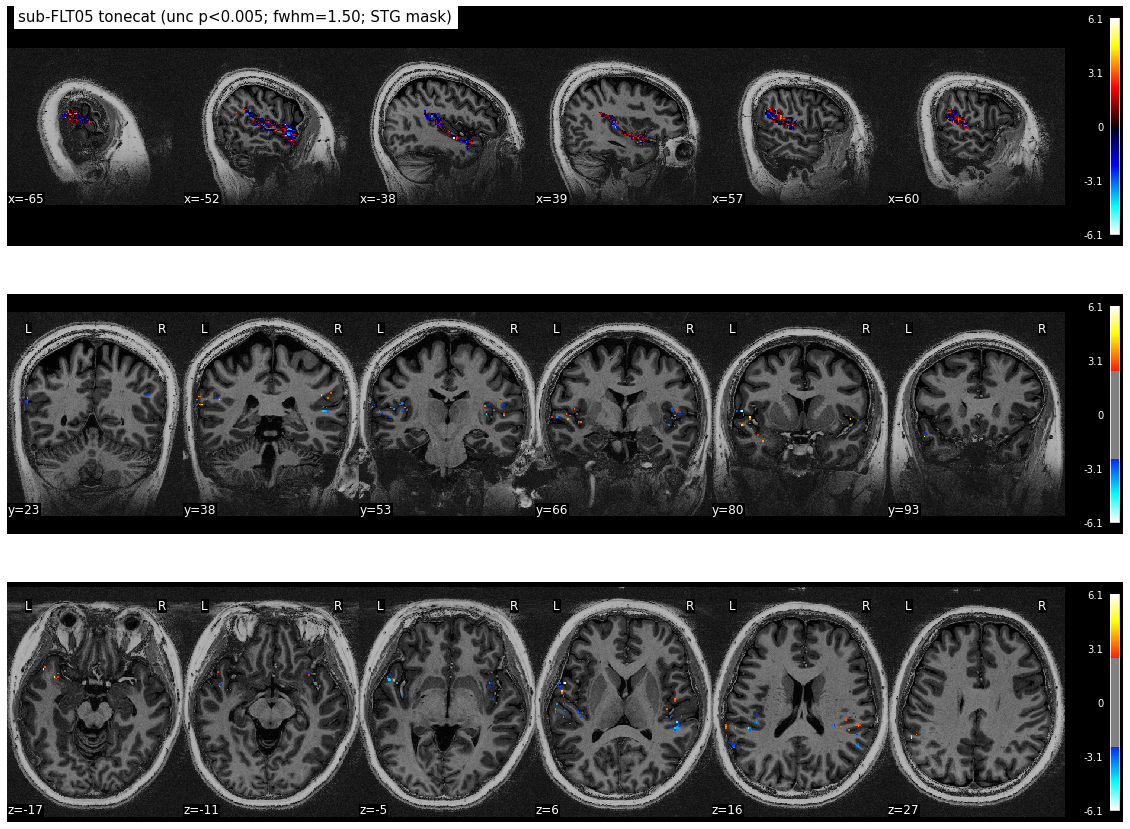

In [95]:
# plot
fig, axes = plt.subplots(3, 1, figsize=(20, 15))
plotting.plot_stat_map(masked_img, bg_img=t1w_fpath, colorbar=True, #threshold=thresh_unc,
                      title='sub-%s %s (unc p<%.03f; fwhm=%.02f; STG mask)'%(model.subject_label, 
                                                                   task_label,p_val,fwhm_sub),
                      axes=axes[0],
                      display_mode='x', cut_coords=6)
plotting.plot_stat_map(masked_img, bg_img=t1w_fpath, colorbar=True, threshold=thresh_unc,
                       axes=axes[1],
                       display_mode='y', cut_coords=6)
plotting.plot_stat_map(masked_img, bg_img=t1w_fpath, colorbar=True, threshold=thresh_unc,
                       axes=axes[2],
                       display_mode='z', cut_coords=6)
plotting.show()

# save plot
plot_fpath = os.path.join(nilearn_dir, 
                          'sub-%s_task-%s_fwhm-%.02f_pval-%.03f_space-%s_mask-aud.png'%(model.subject_label,
                                                                    task_label,fwhm_sub, p_val,
                                                                    space_label))
#fig.savefig(plot_fpath)

#### Load subcortical (MNI space) regions

In [46]:
import nibabel as nib

In [50]:
subcort_atlas_fpath = os.path.join('/bgfs/bchandrasekaran/krs228/',
                                   'data/reference/',
                                   'MNI_space/atlases/',
                                   'sub-invivo_MNI_rois.nii.gz')
subcort_img = nib.load(subcort_atlas_fpath)
print(np.unique(subcort_img.get_fdata()))

[0. 1. 2. 3. 4. 5. 6. 7. 8.]


In [54]:
sub_id = models[sx].subject_label
## NOT YET RUN IN MNI SPACE - WILL NOT WORK FOR OTHER SUBJECTS BESIDES FLT01
zmap_example_fpath = os.path.join('/bgfs/bchandrasekaran/krs228/data/FLT/data_bids/',
                                      'derivatives/nilearn/level-1_fwhm-1.50/',
                                      'sub-%s_space-MNI152NLin2009cAsym/trial_models/run00/'%sub_id,
                                      'sub-%s_task-tonecat_fwhm-1.50_space-MNI152NLin2009cAsym_contrast-di1_aN_trial3_run00_zmap.nii.gz'%sub_id)
zmap = nib.load(zmap_example_fpath)

subcort_func_img = resample_to_img(subcort_img, zmap, interpolation='nearest')

In [55]:
print(subcort_img.get_fdata().shape)
print(zmap.get_fdata().shape)
print(subcort_func_img.get_fdata().shape)
print(np.unique(subcort_func_img.get_fdata()))

(720, 600, 840)
(129, 153, 129)
(129, 153, 129)
[0. 1. 2. 3. 4. 5. 6. 7. 8.]


In [56]:
mask_IC = np.zeros(zmap.shape)
mask_IC[np.where(subcort_func_img.get_fdata() == 5)] = 1
mask_IC[np.where(subcort_func_img.get_fdata() == 6)] = 1
print(np.unique(mask_IC))

[0. 1.]


In [58]:
print(nilearn_dir)

/bgfs/bchandrasekaran/krs228/data/FLT/derivatives/nilearn


In [59]:
# create nifti-like image and save to nifti file
mask_IC_img = nib.Nifti1Image(mask_IC, affine = zmap.affine)

mask_IC_fpath = os.path.join(nilearn_dir,
                                         'sub-%s_space-%s_mask-IC.nii.gz'%(model.subject_label, 
                                                                           space_label))
nib.save(mask_IC_img, mask_IC_fpath)

## Decoding

In [15]:
from glob import glob

from nilearn.decoding import Decoder
from nilearn.input_data import NiftiMasker

/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [16]:
#sx = 1
sub_id = 'FLT04'
fwhm_sub = 1.5
space_label = 'T1w' #'MNI152NLin2009cAsym' 

nilearn_sub_dir = os.path.join(bidsroot, 'derivatives', 'nilearn', 
                                               'level-1_fwhm-%.02f'%fwhm_sub, 
                                               'sub-%s_space-%s'%(sub_id, space_label))
print(nilearn_sub_dir)

z_maps = sorted(glob(nilearn_sub_dir+'/trial_models'+'/run*/*di*nii.gz'))
print('# of z-maps: ', len(z_maps))

# 16 stimulus decoding
conditions_all = [os.path.basename(x)[-31:-18] for x in z_maps] 
print(conditions_all[:10])

# 4-category decoding
conditions_tone = [stim[:3] for stim in conditions_all]
print(conditions_tone[:10])

conditions_talker = [stim[4:6] for stim in conditions_all]
print(conditions_talker[:10])

# pick the labels
conditions = conditions_tone

print('# of trials: ', len(conditions))
print(conditions[:10])
print('unique # of conditions = ', np.unique(conditions).shape)

/bgfs/bchandrasekaran/krs228/data/FLT/data_bids/derivatives/nilearn/level-1_fwhm-1.50/sub-FLT04_space-T1w
# of z-maps:  288
['di1_aN_trial1', 'di1_aN_trial2', 'di1_aN_trial3', 'di1_bN_trial1', 'di1_bN_trial2', 'di1_bN_trial3', 'di1_hN_trial1', 'di1_hN_trial2', 'di1_hN_trial3', 'di1_iN_trial1']
['di1', 'di1', 'di1', 'di1', 'di1', 'di1', 'di1', 'di1', 'di1', 'di1']
['aN', 'aN', 'aN', 'bN', 'bN', 'bN', 'hN', 'hN', 'hN', 'iN']
# of trials:  288
['di1', 'di1', 'di1', 'di1', 'di1', 'di1', 'di1', 'di1', 'di1', 'di1']
unique # of conditions =  (4,)


In [17]:
z_maps[0][-31:-18]

'di1_aN_trial1'

In [18]:
z_maps

['/bgfs/bchandrasekaran/krs228/data/FLT/data_bids/derivatives/nilearn/level-1_fwhm-1.50/sub-FLT04_space-T1w/trial_models/run00/sub-FLT04_task-tonecat_fwhm-1.50_space-T1w_contrast-di1_aN_trial1_run00_zmap.nii.gz',
 '/bgfs/bchandrasekaran/krs228/data/FLT/data_bids/derivatives/nilearn/level-1_fwhm-1.50/sub-FLT04_space-T1w/trial_models/run00/sub-FLT04_task-tonecat_fwhm-1.50_space-T1w_contrast-di1_aN_trial2_run00_zmap.nii.gz',
 '/bgfs/bchandrasekaran/krs228/data/FLT/data_bids/derivatives/nilearn/level-1_fwhm-1.50/sub-FLT04_space-T1w/trial_models/run00/sub-FLT04_task-tonecat_fwhm-1.50_space-T1w_contrast-di1_aN_trial3_run00_zmap.nii.gz',
 '/bgfs/bchandrasekaran/krs228/data/FLT/data_bids/derivatives/nilearn/level-1_fwhm-1.50/sub-FLT04_space-T1w/trial_models/run00/sub-FLT04_task-tonecat_fwhm-1.50_space-T1w_contrast-di1_bN_trial1_run00_zmap.nii.gz',
 '/bgfs/bchandrasekaran/krs228/data/FLT/data_bids/derivatives/nilearn/level-1_fwhm-1.50/sub-FLT04_space-T1w/trial_models/run00/sub-FLT04_task-toneca

### Nilearn `Decoder` accuracies

from https://nilearn.github.io/auto_examples/02_decoding/plot_haxby_glm_decoding.html#build-the-decoding-pipeline

**note: does not generate predictions for each fold, so cannot use for confusion matrix generation**

In [19]:
n_runs = 6
split_index = round(len(z_maps) * (n_runs-1) / n_runs)
print('# of training images = ', split_index)

# of training images =  240


In [44]:
# available space-T1w masks: aud_mask_func_img, lh_mask_func_img, rh_mask_func_img
# available space-MNI masks: mask_IC_img
mask_descrip = 'Right-Putamen' # 'L-TTG' #'aud-ctx'
mask_fpath = nib.load(os.path.join(nilearn_dir, 'sub-%s_mask-%s.nii.gz'%(sub_id, mask_descrip)))
#mask = mask_IC_fpath

cv = 5
decoder=Decoder(estimator='svc', mask=mask_fpath,
                standardize=False,
                screening_percentile=10, 
                cv=cv,
               )
#decoder.fit(z_maps[:split_index], conditions[:split_index])
decoder.fit(z_maps, conditions)

/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/_utils/param_validation.py:197: UserWarning: Brain mask is smaller than .5% of the volume human brain. This object is probably not tuned tobe used on such data.
  screening_percentile_ = _adjust_screening_percentile(


In [45]:
classification_accuracy = np.mean(list(decoder.cv_scores_.values()))
chance_level = 1. / len(np.unique(conditions))
print('{} {} classification accuracy: {:4f} / Chance level: {}'.format(
       sub_id, mask_descrip, classification_accuracy, chance_level))

FLT04 Right-Putamen classification accuracy: 0.518311 / Chance level: 0.25


saved figure to  /bgfs/bchandrasekaran/krs228/data/FLT/data_bids/derivatives/nilearn/level-1_fwhm-1.50/sub-FLT04_space-T1w/trial_models/masked_data/FLT04_space-T1w_roi-Right-Putamen_trial_decoding_accuracy.png


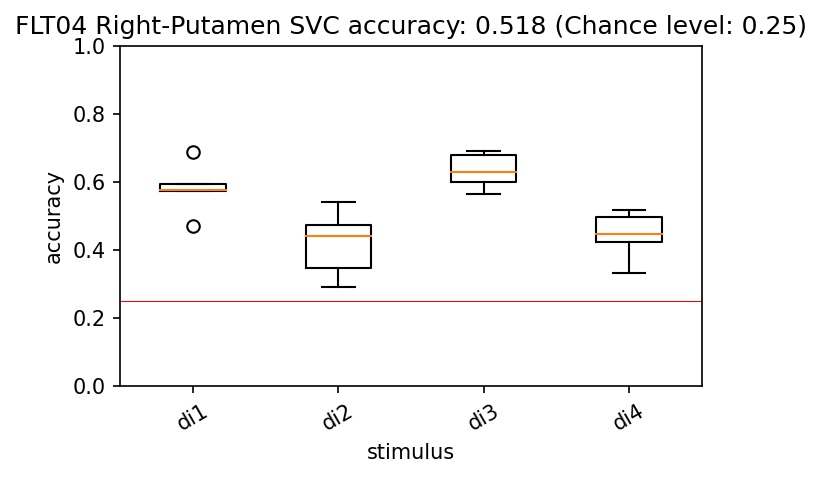

In [46]:
# Create and save prediction accuracy plot

os.makedirs(os.path.join(nilearn_sub_dir, 'trial_models', 'masked_data'), exist_ok=True)

region_string = mask_descrip

acc_plot_fpath = os.path.join(nilearn_sub_dir, 'trial_models', 'masked_data',
                                '%s_space-%s_roi-%s_trial_decoding_accuracy.png'%(sub_id, 
                                                                           space_label,
                                                                           mask_descrip))

from matplotlib import pyplot as plt
#plt.figure(figsize=(8,3), dpi=150)
plt.figure(figsize=(5,3), dpi=150)
plt.boxplot(list(decoder.cv_scores_.values()));
plt.axhline(y=chance_level, color='r', linewidth=0.5)
plt.title('{} {} SVC accuracy: {:.03f} (Chance level: {})'.format(
            sub_id, region_string, classification_accuracy, chance_level))
plt.xlabel('stimulus')
plt.ylabel('accuracy')
plt.ylim([0, 1])
plt.xticks(range(1, len(np.unique(conditions))+1), 
           np.unique(conditions), 
           rotation=30);


# save figure
plt.savefig(acc_plot_fpath)
print('saved figure to ', acc_plot_fpath)


In [47]:
decoder.cv_scores_

{'di1': [0.4697674418604651,
  0.6883720930232559,
  0.5925324675324676,
  0.5730897009966778,
  0.5764119601328903],
 'di2': [0.2889610389610389,
  0.4724025974025974,
  0.3472868217054264,
  0.4396825396825397,
  0.5415282392026578],
 'di3': [0.6294573643410852,
  0.6006493506493507,
  0.689935064935065,
  0.6794019933554817,
  0.5634920634920635],
 'di4': [0.5162337662337663,
  0.3302325581395349,
  0.4232558139534883,
  0.4966777408637874,
  0.446843853820598]}

In [48]:
len(decoder.coef_img_)

4

In [49]:
decoder.coef_img_

{'di1': <nibabel.nifti1.Nifti1Image at 0x7ff6afda3d00>,
 'di2': <nibabel.nifti1.Nifti1Image at 0x7ff69de96520>,
 'di3': <nibabel.nifti1.Nifti1Image at 0x7ff69de96880>,
 'di4': <nibabel.nifti1.Nifti1Image at 0x7ff6a58e3a90>}

In [50]:
# save 4-D decoding coefficient images to nifti (3-D x trial type prediction)
decoding_dir = os.path.join(nilearn_sub_dir, 'trial_models', 'masked_data', 'decoding')
os.makedirs(decoding_dir, exist_ok=True)
print('saving files to ', decoding_dir)

for ix, decoder_cond in enumerate(decoder.coef_img_):
    decoder_img = decoder.coef_img_[decoder_cond]
    decoder_img_fpath = os.path.join(decoding_dir,
                                     '%s_space-%s_roi-%s_trial_decoding_cond-%s.nii.gz'%(sub_id, 
                                                                               space_label,
                                                                               mask_descrip,
                                                                               decoder_cond))
    nib.save(decoder_img, decoder_img_fpath)

saving files to  /bgfs/bchandrasekaran/krs228/data/FLT/data_bids/derivatives/nilearn/level-1_fwhm-1.50/sub-FLT04_space-T1w/trial_models/masked_data/decoding


In [51]:
# Extract and save masked timeseries data (for analyzing outside of Decoder method)

masker = NiftiMasker(mask_img=mask_fpath, smoothing_fwhm=None, standardize=False)
masked_data = masker.fit_transform(z_maps)

print(masked_data.shape)

masked_data_fpath = os.path.join(nilearn_sub_dir, 'trial_models', 'masked_data',
                                '%s_space-%s_roi-%s_trial_zmaps.csv'%(sub_id, 
                                                                      space_label,
                                                                      mask_descrip))
#np.savetxt(masked_data_fpath, masked_data)
print(masked_data_fpath)

conditions_fpath = os.path.join(nilearn_sub_dir, 'trial_models', 'masked_data',
                                '%s_space-%s_roi-%s_trial_conditions.csv'%(sub_id, 
                                                                           space_label,
                                                                           mask_descrip))
np.savetxt(conditions_fpath, conditions, fmt='%s')
print(conditions_fpath)

(288, 1432)
/bgfs/bchandrasekaran/krs228/data/FLT/data_bids/derivatives/nilearn/level-1_fwhm-1.50/sub-FLT04_space-T1w/trial_models/masked_data/FLT04_space-T1w_roi-Right-Putamen_trial_zmaps.csv
/bgfs/bchandrasekaran/krs228/data/FLT/data_bids/derivatives/nilearn/level-1_fwhm-1.50/sub-FLT04_space-T1w/trial_models/masked_data/FLT04_space-T1w_roi-Right-Putamen_trial_conditions.csv


### Confusion matrix

In [32]:
# first, run a new classifier with a separate training and test set
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

FLT04 Left-Putamen
test trials =  48


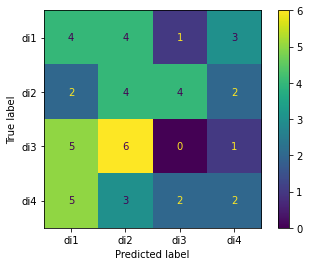

In [33]:
print(sub_id, mask_descrip)
print('test trials = ', len(conditions[split_index:]))
ConfusionMatrixDisplay.from_predictions(conditions[split_index:], y_pred, 
                                        cmap='viridis', 
                                        colorbar=True, include_values=True)

#### Plot decoder coef maps

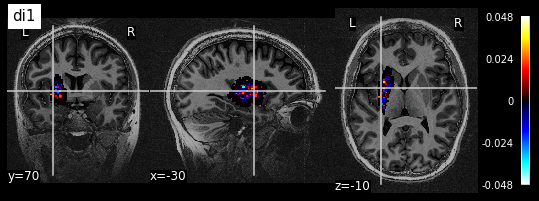

In [30]:
# T1w space (ACtx)
t1w_fpath = layout.get(return_type='filename', subject=sub_id, suffix='T1w', extension='nii.gz')[0]

# plot
for stim in np.unique(conditions[0]): 
    decoder_img = decoder.coef_img_[stim]
    plotting.plot_stat_map(decoder_img, bg_img=t1w_fpath, colorbar=True, 
                           title=stim,
                           cut_coords=[-30, 70, -10]
                           #axes=axes[0],
                           #display_mode='x', cut_coords=6
                           )

plotting.show()


#### sklearn SVM 

In [58]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import svm

In [56]:
#masked_data_fpath = os.path.join('/bgfs/bchandrasekaran/krs228/data/FLT/',
#                                   'data_bids/derivatives/nilearn/level-1_fwhm-1.50/',
#                                   'sub-FLT01_space-MNI152NLin2009cAsym/trial_models/masked_data/',
#                                   'FLT01_roi-IC_trial_zmaps.csv')
masked_data_fpath = os.path.join('/bgfs/bchandrasekaran/krs228/data/FLT/',
                                   'data_bids/derivatives/nilearn/level-1_fwhm-1.50/',
                                   'sub-FLT01_space-T1w/trial_models/masked_data/',
                                   'FLT01_space-T1w_roi-actx_trial_zmaps.csv')

masked_data = np.genfromtxt(masked_data_fpath)

In [57]:
n_train = round(len(z_maps)*0.75)
n_test = len(z_maps) - n_train

In [59]:
cv = KFold(n_splits=10)

clf = svm.LinearSVC()

In [60]:
# run SVM with cross-validation and create confusion matrix
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(clf, masked_data, conditions, cv=10)
conf_mat = confusion_matrix(conditions, y_pred)

/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Libline

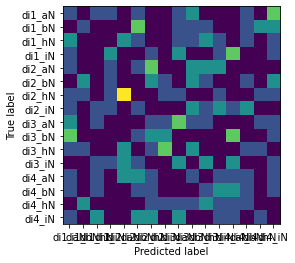

In [64]:
#print('input data file: ', masked_data_fpath)
ConfusionMatrixDisplay.from_predictions(conditions, y_pred, 
                                        cmap='viridis', colorbar=False, include_values=False)

#### TEST: confusion matrix using decoder (then replaced by SVM) 

In [103]:
cv = KFold(n_splits=10)
fold = 0
prediction = []
test_conds = []
for train, test in cv.split(conditions):
    fold += 1
    subdecode=svm.LinearSVC()
    
    # fit on the training set
    print('# of training images: ', n_train)
    print('# of testing images:  ', n_test)

    print('fitting the training data')
    subdecode.fit(masked_data[train, :], np.array(conditions)[train])
    
    # test
    print('predicting the test images')
    y_pred = subdecode.predict(masked_data[test, :])
    #print(y_pred)
    prediction.append(y_pred)
    
    #print(np.array(conditions)[test])
    test_conds.append(np.array(conditions)[test])

# of training images:  216
# of testing images:   72
fitting the training data
predicting the test images
['di4_aN' 'di4_aN' 'di3_bN' 'di3_iN' 'di4_bN' 'di3_iN' 'di3_hN' 'di4_hN'
 'di3_hN' 'di3_hN' 'di3_hN' 'di3_iN' 'di3_iN' 'di4_hN' 'di4_bN' 'di4_hN'
 'di3_hN' 'di3_iN' 'di4_bN' 'di4_hN' 'di4_hN' 'di3_iN' 'di4_bN' 'di3_iN'
 'di4_bN' 'di4_hN' 'di4_hN' 'di4_iN' 'di4_hN']
# of training images:  216
# of testing images:   72
fitting the training data
predicting the test images
['di1_aN' 'di1_hN' 'di1_bN' 'di3_aN' 'di1_aN' 'di1_aN' 'di2_iN' 'di2_aN'
 'di1_aN' 'di1_bN' 'di1_hN' 'di2_iN' 'di1_bN' 'di1_iN' 'di1_aN' 'di2_hN'
 'di1_bN' 'di1_aN' 'di2_bN' 'di3_iN' 'di4_bN' 'di3_iN' 'di3_iN' 'di2_bN'
 'di4_bN' 'di4_bN' 'di4_iN' 'di3_hN' 'di2_hN']
# of training images:  216
# of testing images:   72
fitting the training data
predicting the test images
['di4_hN' 'di4_hN' 'di1_iN' 'di1_bN' 'di3_hN' 'di4_hN' 'di1_bN' 'di4_iN'
 'di1_iN' 'di4_hN' 'di4_hN' 'di2_aN' 'di4_hN' 'di1_bN' 'di2_aN' 'di4_hN'
 'di

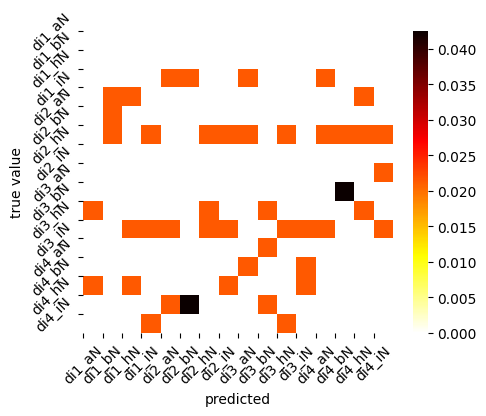

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.0212766  0.0212766
  0.         0.         0.0212766  0.         0.         0.
  0.0212766  0.         0.         0.        ]
 [0.         0.0212766  0.0212766  0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.0212766  0.        ]
 [0.         0.0212766  0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.0212766  0.         0.0212766  0.         0.
  0.0212766  0.0212766  0.0212766  0.         0.0212766  0.
  0.0212766  0.0212766  0.0212766  0.0

In [346]:
import seaborn as sns
plt.figure(figsize=(5,4),dpi=100)
confusion_mat = confusion_matrix(y_pred, conditions[n_train:], normalize='all')
ax = sns.heatmap(confusion_mat, 
                 cmap='hot_r',
                )

ax.set_xticks(range(len(np.unique(conditions))))
ax.set_yticks(range(len(np.unique(conditions))))
ax.set_xticklabels(np.unique(conditions), rotation=45)
ax.set_yticklabels(np.unique(conditions), rotation=45)

#ax.set_xticklabels(range(1,5))
#ax.set_yticklabels(range(1,5))

ax.set_xlabel('predicted')
ax.set_ylabel('true value')

plt.show()
print(confusion_mat)

#### Plot decoder maps

In [113]:
# MNI space (IC)
t1w_mni_fpath = os.path.join('/bgfs/bchandrasekaran/krs228/data/FLT/',
                             'derivatives', 'fmriprep_2022.03.22',
                             'sub-FLT01/anat',
                             'sub-FLT01_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz')

# plot
for stim in np.unique(conditions): #stim_list:
    decoder_img = decoder.coef_img_[stim]
    plotting.plot_stat_map(decoder_img, bg_img=t1w_mni_fpath, colorbar=True, 
                           title=stim,
                           cut_coords=[1, -35, -9]
                           #axes=axes[0],
                           #display_mode='x', cut_coords=6
                           )

plotting.show()


### striatum

In [20]:
import nilearn.decoding
from scipy.ndimage import binary_dilation, binary_erosion
from nilearn.image import resample_to_img

In [ ]:
print(aparc_fpath)
aparc_img = nib.load(aparc_fpath)
aparc_data = aparc_img.get_fdata()
aparc_affine = aparc_img.affine
print(aparc_affine)

In [ ]:
t1w_img = nib.load(t1w_fpath)
t1w_affine=t1w_img.affine
print(t1w_affine)

#### define striatum masks

In [27]:
#for mx in range(len(models)):
#    sub_id = models[mx].subject_label
for sub_id in ['FLT01', 'FLT02', 'FLT03', 'FLT04', 'FLT05', 'FLT07']:
    print(sub_id)
    
    zmap_example_fpath = os.path.join('/bgfs/bchandrasekaran/krs228/data/FLT/',
                                      'data_bids/sub-%s/func/'%sub_id,
                                      'sub-%s_task-tonecat_run-02_bold.nii.gz'%sub_id)
    
    aparc_fpath = os.path.join(deriv_dir, 'fmriprep/','sub-%s/anat'%sub_id,
                                'sub-%s_desc-aparcaseg_dseg.nii.gz'%sub_id)
    print(aparc_fpath)
    aparc_img = nib.load(aparc_fpath)
    aparc_data = aparc_img.get_fdata()
    aparc_affine = aparc_img.affine

    lh_mask = np.zeros(aparc_data.shape)
    lh_mask[np.where(aparc_data == 11)] = 1 # Left-Caudate
    lh_mask[np.where(aparc_data == 12)] = 1 # Left-Putamen
    lh_mask[np.where(aparc_data == 13)] = 1 # Left-Pallidum
    lh_mask[np.where(aparc_data == 26)] = 1 # Left-Accumbens-area

    rh_mask = np.zeros(aparc_data.shape)
    rh_mask[np.where(aparc_data == 50)] = 1 # Right-Caudate
    rh_mask[np.where(aparc_data == 51)] = 1 # Right-Putamen
    rh_mask[np.where(aparc_data == 52)] = 1 # Right-Pallidum
    rh_mask[np.where(aparc_data == 58)] = 1 # Right-Accumbens-area

    lh_mask_img = nib.Nifti1Image(lh_mask, aparc_affine)
    rh_mask_img = nib.Nifti1Image(rh_mask, aparc_affine)

    striatum_mask = np.zeros(aparc_data.shape)
    striatum_mask[np.where(lh_mask == 1)] = 1
    striatum_mask[np.where(rh_mask == 1)] = 1

    striatum_mask_ero = binary_erosion(striatum_mask).astype(striatum_mask.dtype)
    striatum_mask_dil = binary_dilation(striatum_mask).astype(striatum_mask.dtype)

    striatum_mask_erodil = binary_dilation(striatum_mask_ero).astype(striatum_mask_ero.dtype)


    striatum_mask_fs_img = nib.Nifti1Image(striatum_mask, affine=aparc_affine)
    striatum_mask_ero_fs_img = nib.Nifti1Image(striatum_mask_ero, affine=aparc_affine)
    striatum_mask_dil_fs_img = nib.Nifti1Image(striatum_mask_dil, affine=aparc_affine)

    striatum_mask_erodil_fs_img = nib.Nifti1Image(striatum_mask_erodil, affine=aparc_affine)


    #striatum_mask_anat_img = resample_to_img(striatum_mask_erodil_fs_img, t1w_fpath, 
    #                                         interpolation='nearest')
    striatum_mask_func_img = resample_to_img(striatum_mask_erodil_fs_img, zmap_example_fpath, 
                                             interpolation='nearest')

    # save mask file
    out_fpath = os.path.join(nilearn_dir, 'sub-%s_mask-striatum.nii.gz'%sub_id)
    nib.save(striatum_mask_func_img, out_fpath)

FLT07
/bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT07/anat/sub-FLT07_desc-aparcaseg_dseg.nii.gz


ValueError: File not found: '/bgfs/bchandrasekaran/krs228/data/FLT/data_bids/sub-FLT07/func/sub-FLT07_task-tonecat_run-02_bold.nii.gz'

In [29]:
for sub_id in ['FLT01', 'FLT02', 'FLT03', 'FLT04', 'FLT05']:
    print(sub_id)
    
    zmap_example_fpath = os.path.join('/bgfs/bchandrasekaran/krs228/data/FLT/',
                                      'data_bids/sub-%s/func/'%sub_id,
                                      'sub-%s_task-tonecat_run-02_bold.nii.gz'%sub_id)
    
    aparc_fpath = os.path.join(deriv_dir, 'fmriprep/','sub-%s/anat'%sub_id,
                                'sub-%s_desc-aparcaseg_dseg.nii.gz'%sub_id)
    print(aparc_fpath)
    aparc_img = nib.load(aparc_fpath)
    aparc_data = aparc_img.get_fdata()
    aparc_affine = aparc_img.affine

    lh_mask = np.zeros(aparc_data.shape)
    lh_mask[np.where(aparc_data == 12)] = 1 # Left-Putamen

    rh_mask = np.zeros(aparc_data.shape)
    rh_mask[np.where(aparc_data == 51)] = 1 # Right-Putamen

    lh_mask_img = nib.Nifti1Image(lh_mask, aparc_affine)
    rh_mask_img = nib.Nifti1Image(rh_mask, aparc_affine)


    left_mask_func_img = resample_to_img(lh_mask_img, zmap_example_fpath, 
                                             interpolation='nearest')
    right_mask_func_img = resample_to_img(rh_mask_img, zmap_example_fpath, 
                                             interpolation='nearest')

    # save mask file
    out_fpath = os.path.join(nilearn_dir, 'sub-%s_mask-Left-Putamen.nii.gz'%sub_id)
    nib.save(left_mask_func_img, out_fpath)
    out_fpath = os.path.join(nilearn_dir, 'sub-%s_mask-Right-Putamen.nii.gz'%sub_id)
    nib.save(right_mask_func_img, out_fpath)

FLT01
/bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/anat/sub-FLT01_desc-aparcaseg_dseg.nii.gz
FLT02
/bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT02/anat/sub-FLT02_desc-aparcaseg_dseg.nii.gz
FLT03
/bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/anat/sub-FLT03_desc-aparcaseg_dseg.nii.gz
FLT04
/bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/anat/sub-FLT04_desc-aparcaseg_dseg.nii.gz
FLT05
/bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/anat/sub-FLT05_desc-aparcaseg_dseg.nii.gz


In [ ]:
# DO NOT USE plotting.view_img – crashes the computer
plotting.plot_stat_map(striatum_mask_anat_img, bg_img=t1w_fpath, 
                       colorbar=False)#,
                       #display_mode='y', cut_coords=[60,70,80,90]);

In [ ]:
plotting.plot_stat_map(striatum_mask_func_img, bg_img=t1w_fpath, 
                       colorbar=False)